In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img="D:/Engineering/New folder/turn_left_1.png"
img=cv2.imread(img)

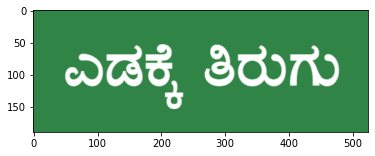

In [3]:
#converting to RGB format
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img)

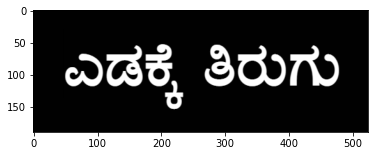

In [4]:
#converting to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
plt.imshow(img_gray,cmap="gray")

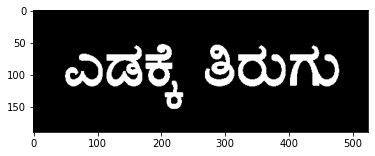

In [5]:
#otsu's method of binarization
thresh, img_bin = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(img_bin,cmap='gray')

In [6]:
#get noise
def getNoise(img,imgContour):
    noise=[]
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area<1000:
            noise.append(cnt)
            peri = cv2.arcLength(cnt,True)
            approx= cv2.approxPolyDP(cnt,0.02*peri,True)
            x,y,w,h=cv2.boundingRect(approx)
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,0,0),5)
    return noise

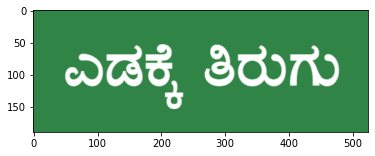

In [7]:
imgContour=img.copy()
imgCanny=cv2.Canny(img_bin,90,90)
kernel=np.ones((5,5))
imgDil=cv2.dilate(imgCanny,kernel,iterations=1)
x=getNoise(imgDil,imgContour)
plt.imshow(imgContour)

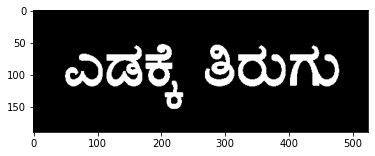

In [8]:
#filling the noise region with black pixels
cv2.drawContours(img_bin, x, -1, color=(0,0,0), thickness=cv2.FILLED)
rotated=np.array(img_bin)
plt.imshow(img_bin,cmap='gray')
img1=img_bin

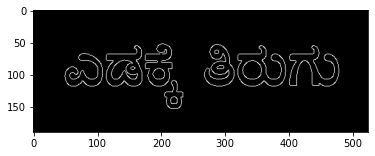

In [9]:
#detecting the edges
imgCanny=cv2.Canny(img_bin,80,80)
kernel=np.ones((5,5))
plt.imshow(imgCanny,cmap='gray')

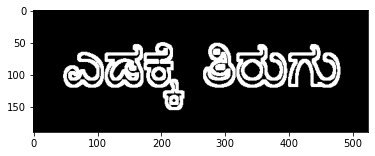

In [10]:
#Dilation is performed to accentuate the features
imgDil=cv2.dilate(imgCanny,kernel,iterations=1)
plt.imshow(imgDil,cmap='gray')

<ipython-input-11-f2a405700cfc>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(img_pixel)


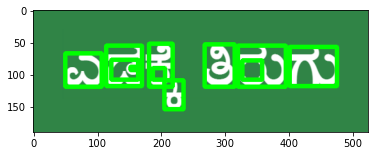

In [11]:
def getContours(img,imgContour):
    contours,hierarchy=cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    img_pixel=[]
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area>15:
            peri = cv2.arcLength(cnt,True)
            approx= cv2.approxPolyDP(cnt,0.02*peri,True)
            x,y,w,h=cv2.boundingRect(approx)
            cv2.rectangle(imgContour,(x,y),(x+w,y+h),(0,255,0),5) #drawing bounding box
            new_img=img1[y:y+h,x:x+w] #cropping the ROI
            img_pixel.append(new_img)
    return np.array(img_pixel)
    
img_pixel=getContours(imgCanny,img)
plt.imshow(img)

In [12]:
len(img_pixel)

11

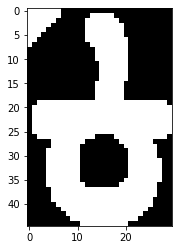

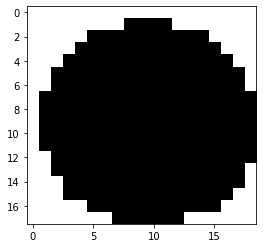

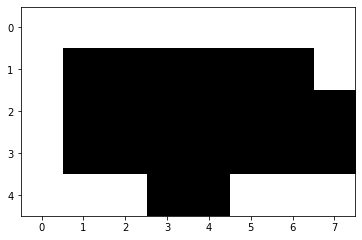

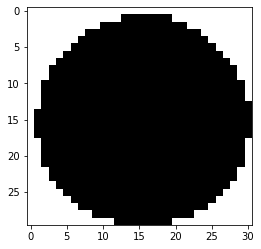

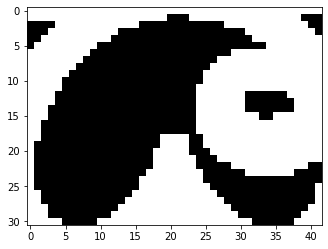

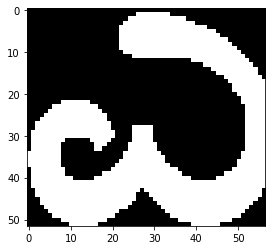

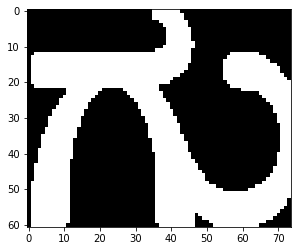

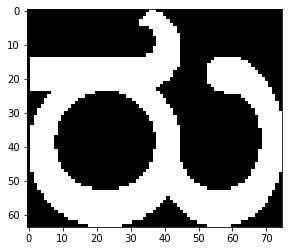

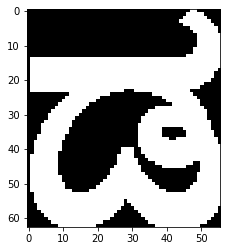

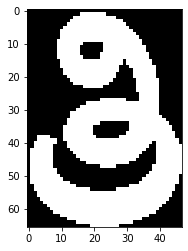

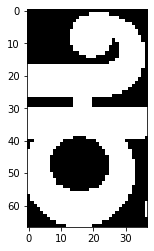

In [13]:
for i in img_pixel:
    plt.imshow(i,cmap="gray")
    plt.show()